In [1]:
import cartopy
import numpy as np
import xarray as xa
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [2]:
pr_hist = xa.open_dataarray("CanESM2-hist-pr.nc")
print(pr_hist.shape)
time_hist = pr_hist.time
pr_rcp85 = xa.open_dataarray("CanESM2-85-pr.nc")
time_85 = pr_rcp85.time
lat = pr_hist.lat
lon = pr_hist.lon
elevation = xa.open_dataset("topo_file_LOCA.nc")
dah = elevation.dah
trasp = elevation.trasp
latitude = elevation.latitude
longitude = elevation.longitude
elevation = elevation.elevation_prism
print(elevation)

(7305, 112, 72)
<xarray.DataArray 'elevation_prism' (lat: 112, lon: 72)>
array([[1883., 1931., 1991., ..., 1455., 1480., 1525.],
       [2012., 2147., 2036., ..., 1491., 1494., 1422.],
       [2068., 2003., 2062., ..., 1485., 1518., 1423.],
       ...,
       [2204., 2115., 2126., ..., 1580., 1502., 1368.],
       [2195., 2141., 2117., ..., 1436., 1408., 1370.],
       [2442., 2195., 2170., ..., 1362., 1323., 1304.]])
Coordinates:
  * lon      (lon) float64 -109.0 -108.9 -108.8 -108.8 ... -104.7 -104.6 -104.5
  * lat      (lat) float64 35.03 35.09 35.16 35.22 ... 41.78 41.84 41.91 41.97


In [3]:
CESM_hist_range_loca = np.load('Metrics/CESM_hist_range_loca.npy')
CESM_hist_range = np.load('Metrics/CESM_hist_range.npy')
CESM_rcp_range_loca = np.load('Metrics/CESM_rcp_range_loca.npy')
CESM_rcp_range = np.load('Metrics/CESM_rcp_range.npy')
print(CESM_rcp_range.shape)
CESM_range_change = CESM_hist_range - CESM_rcp_range
CESM_range_change_loca = CESM_hist_range_loca - CESM_rcp_range_loca
EC_hist_range_loca = np.load('Metrics/EC_hist_range_loca.npy')
EC_hist_range = np.load('Metrics/EC_hist_range.npy')
EC_rcp_range_loca = np.load('Metrics/EC_rcp_range_loca.npy')
EC_rcp_range = np.load('Metrics/EC_rcp_range.npy')
EC_range_change = EC_hist_range - EC_rcp_range
EC_range_change_loca = EC_hist_range_loca - EC_rcp_range_loca
GFDL_hist_range_loca = np.load('Metrics/GFDL_hist_range_loca.npy')
GFDL_hist_range = np.load('Metrics/GFDL_hist_range.npy')
GFDL_rcp_range_loca = np.load('Metrics/GFDL_rcp_range_loca.npy')
GFDL_rcp_range = np.load('Metrics/GFDL_rcp_range.npy')
GFDL_range_change = GFDL_hist_range - GFDL_rcp_range
GFDL_range_change_loca = GFDL_hist_range_loca - GFDL_rcp_range_loca
CNRM_hist_range_loca = np.load('Metrics/CNRM_hist_range_loca.npy')
CNRM_hist_range = np.load('Metrics/CNRM_hist_range.npy')
CNRM_rcp_range_loca = np.load('Metrics/CNRM_rcp_range_loca.npy')
CNRM_rcp_range = np.load('Metrics/CNRM_rcp_range.npy')
CNRM_range_change = CNRM_hist_range - CNRM_rcp_range
CNRM_range_change_loca = CNRM_hist_range_loca - CNRM_rcp_range_loca
HadGEM_hist_range_loca = np.load('Metrics/HadGEM_hist_range_loca.npy')
HadGEM_hist_range = np.load('Metrics/HadGEM_hist_range.npy')
HadGEM_rcp_range_loca = np.load('Metrics/HadGEM_rcp_range_loca.npy')
HadGEM_rcp_range = np.load('Metrics/HadGEM_rcp_range.npy')
HadGEM_range_change = HadGEM_hist_range - HadGEM_rcp_range
HadGEM_range_change_loca = HadGEM_hist_range_loca - HadGEM_rcp_range_loca
MIROC_hist_range_loca = np.load('Metrics/MIROC_hist_range_loca.npy')
MIROC_hist_range = np.load('Metrics/MIROC_hist_range.npy')
MIROC_rcp_range_loca = np.load('Metrics/MIROC_rcp_range_loca.npy')
MIROC_rcp_range = np.load('Metrics/MIROC_rcp_range.npy')
MIROC_range_change = MIROC_hist_range - MIROC_rcp_range
MIROC_range_change_loca = MIROC_hist_range_loca - MIROC_rcp_range_loca

(112, 72)


In [4]:
print(np.min(CESM_hist_range_loca), ' ', np.max(CESM_hist_range_loca))
print(np.min(CESM_hist_range), ' ', np.max(CESM_hist_range))
print(np.min(CESM_range_change), ' ', np.max(CESM_range_change))
print(np.min(CESM_range_change_loca), ' ', np.max(CESM_range_change_loca))

2.7222222222222223   365.0
21.166666666666668   232.72222222222223
2.0   105.94444444444443
-2.0555555555555554   170.38888888888889


In [5]:
print(np.min(EC_hist_range_loca), ' ', np.max(EC_hist_range_loca))
print(np.min(EC_hist_range), ' ', np.max(EC_hist_range))
print(np.min(EC_range_change), ' ', np.max(EC_range_change))
print(np.min(EC_range_change_loca), ' ', np.max(EC_range_change_loca))

2.2222222222222223   301.6666666666667
25.555555555555557   233.94444444444446
-10.666666666666657   83.38888888888889
-19.166666666666664   90.2777777777778


In [6]:
from scipy.stats import pearsonr
print(pearsonr(EC_hist_range.flatten(), EC_hist_range_loca.flatten()))
print(pearsonr(EC_rcp_range.flatten(), EC_rcp_range_loca.flatten()))
print(pearsonr(CESM_hist_range.flatten(), CESM_hist_range_loca.flatten()))
print(pearsonr(CESM_rcp_range.flatten(), CESM_rcp_range_loca.flatten()))

(0.8430371686951685, 0.0)
(0.9129601905281146, 0.0)
(0.8300423744785626, 0.0)
(0.9063305135745687, 0.0)


In [7]:
def add_latlon(ax, left, bottom, right, top):
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = bottom
    gl.right_labels = right
    gl.top_labels = top
    gl.left_labels = left
    
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylocator = mticker.FixedLocator([36, 37, 38, 39, 40, 41])
    gl.xlocator = mticker.FixedLocator([-105, -106, -107, -108])

# NSIDC

In [8]:
# nsidc = xa.open_dataarray("../co_prediction/SWES_NSIDC_all.nc")
nsidc = xa.open_dataarray('../NSIDC/SWES_NSIDC_hist.nc')
nsidc = nsidc.reindex(lat=nsidc.lat[::-1])
nsidc = nsidc.transpose("lat", "lon", "time")
print(nsidc.shape)
print(nsidc.time)
nsidc_lon = nsidc.lon.data
nsidc_lat = nsidc.lat.data

(167, 107, 6574)
<xarray.DataArray 'time' (time: 6574)>
array(['1981-10-01T00:00:00.000000000', '1981-10-02T00:00:00.000000000',
       '1981-10-03T00:00:00.000000000', ..., '1999-09-28T00:00:00.000000000',
       '1999-09-29T00:00:00.000000000', '1999-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-10-01 1981-10-02 ... 1999-09-30
Attributes:
    long_name:  time


In [9]:
hist_acc_nsidc = np.load('Metrics/NSIDC_hist_acc.npy')
hist_melt_nsidc = np.load('Metrics/NSIDC_hist_melt.npy')
hist_days_nsidc = np.load('Metrics/NSIDC_date_hist.npy')
hist_peaks_nsidc = np.load('Metrics/NSIDC_hist_peak.npy')

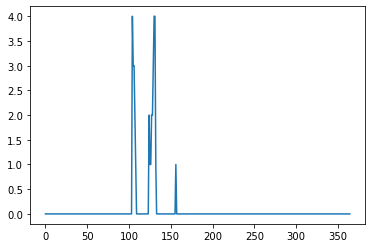

In [10]:
plt.plot(nsidc[166, 53, :365])

22.11764705882353   269.94117647058823
(array([], dtype=int64), array([], dtype=int64))


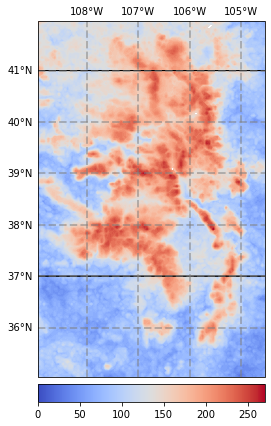

In [11]:
snow_range_nsidc = np.mean(hist_melt_nsidc - hist_acc_nsidc, axis=0)
print(np.nanmin(snow_range_nsidc), " ", np.nanmax(snow_range_nsidc))
print(np.where(snow_range_nsidc == 0))
norm = colors.Normalize(vmin=0, vmax=270)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(121, projection=cartopy.crs.PlateCarree())
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=2, color="gray", alpha=0.5, linestyle="--")
gl.bottom_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator([36, 37, 38, 39, 40, 41])
gl.xlocator = mticker.FixedLocator([-105, -106, -107, -108])
ax.contourf(nsidc_lon, nsidc_lat, snow_range_nsidc, transform=cartopy.crs.PlateCarree(), norm=norm, cmap="coolwarm", levels=70)
ax.add_feature(cartopy.feature.STATES, alpha=0.9)
divider = make_axes_locatable(ax)
cax1 = divider.new_vertical(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=True)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="horizontal",
)
plt.show()

In [12]:
print(np.nanmax(np.mean(hist_acc_nsidc, axis=0)))
print(np.nanmin(np.mean(hist_acc_nsidc, axis=0)))

111.76470588235294
23.58823529411765


In [13]:
print(np.nanmax(np.mean(hist_melt_nsidc, axis=0)))
print(np.nanmin(np.mean(hist_melt_nsidc, axis=0)))

301.70588235294116
94.6470588235294


In [14]:
print(np.nanmax(np.mean(hist_days_nsidc, axis=0)))
print(np.nanmin(np.mean(hist_days_nsidc, axis=0)))

237.64705882352942
80.05882352941177


In [15]:
def plot_snow(ax, snow, norm):
    ax.contourf(longitude, latitude, snow, transform=cartopy.crs.PlateCarree(), norm=norm, cmap='coolwarm', levels=70)
    ax.add_feature(cartopy.feature.STATES, alpha=0.9)

# SSL

In [16]:
print(pearsonr(GFDL_hist_range.flatten(), GFDL_hist_range_loca.flatten()))
print(pearsonr(CNRM_hist_range.flatten(), CNRM_hist_range_loca.flatten()))
print(pearsonr(EC_hist_range.flatten(), EC_hist_range_loca.flatten()))
print(pearsonr(CESM_hist_range.flatten(), CESM_hist_range_loca.flatten()))
print(pearsonr(MIROC_hist_range.flatten(), MIROC_hist_range_loca.flatten()))
print(pearsonr(HadGEM_hist_range.flatten(), HadGEM_hist_range_loca.flatten()))

(0.8205797536012381, 0.0)
(0.842656396402664, 0.0)
(0.8430371686951685, 0.0)
(0.8300423744785626, 0.0)
(0.8383058788181921, 0.0)
(0.835728519121187, 0.0)


In [17]:
print(pearsonr(GFDL_rcp_range.flatten(), GFDL_rcp_range_loca.flatten()))
print(pearsonr(CNRM_rcp_range.flatten(), CNRM_rcp_range_loca.flatten()))
print(pearsonr(EC_rcp_range.flatten(), EC_rcp_range_loca.flatten()))
print(pearsonr(CESM_rcp_range.flatten(), CESM_rcp_range_loca.flatten()))
print(pearsonr(MIROC_rcp_range.flatten(), MIROC_rcp_range_loca.flatten()))
print(pearsonr(HadGEM_rcp_range.flatten(), HadGEM_rcp_range_loca.flatten()))

(0.8407079364844469, 0.0)
(0.914532406783934, 0.0)
(0.9129601905281146, 0.0)
(0.9063305135745687, 0.0)
(0.8876249394891569, 0.0)
(0.8961044489730751, 0.0)


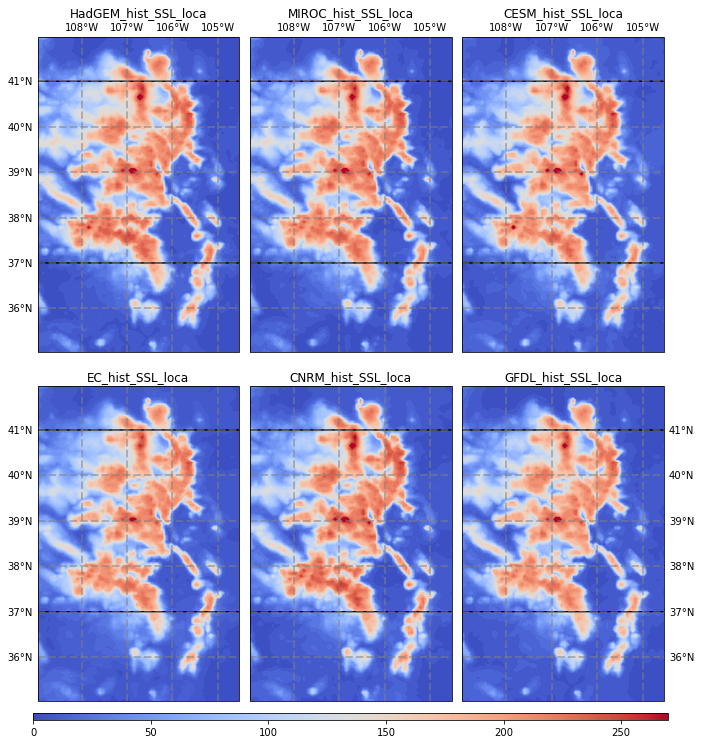

In [18]:
norm = colors.Normalize(vmin=0, vmax=270)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_range_loca, norm)
ax1.set_title("HadGEM_hist_SSL_loca", fontsize=12)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_range_loca, norm)
ax2.set_title("MIROC_hist_SSL_loca", fontsize=12)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_range_loca, norm)
ax3.set_title("CESM_hist_SSL_loca", fontsize=12)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_range_loca, norm)
ax4.set_title("EC_hist_SSL_loca", fontsize=12)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_range_loca, norm)
ax5.set_title("CNRM_hist_SSL_loca", fontsize=12)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_range_loca, norm)
ax6.set_title("GFDL_hist_SSL_loca", fontsize=12)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
add_latlon(ax1, left=True, bottom=False, right=False, top=True)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)
add_latlon(ax3, left=False, bottom=False, right=False, top=True)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)
plt.show()

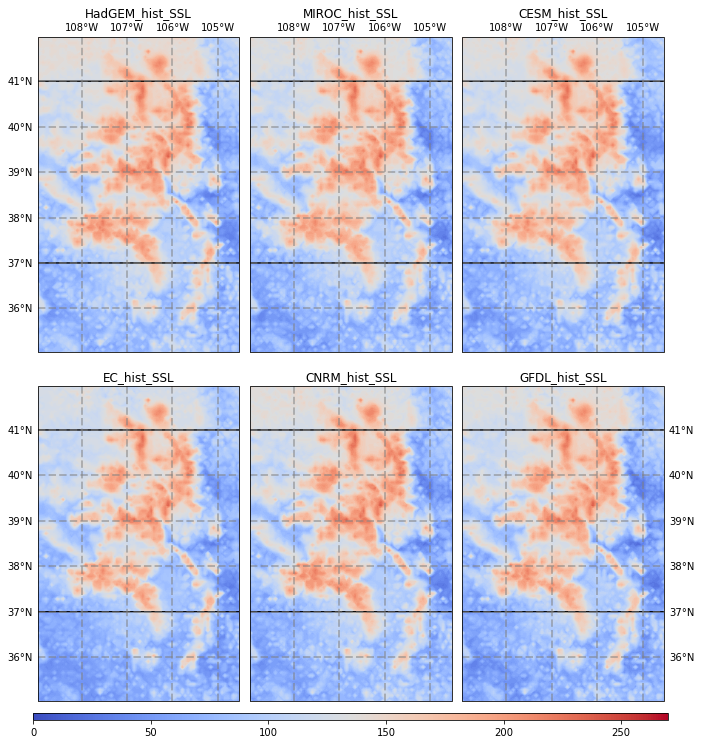

In [19]:
norm = colors.Normalize(vmin=0, vmax=270)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_range, norm)
ax1.set_title("HadGEM_hist_SSL", fontsize=12)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_range, norm)
ax2.set_title("MIROC_hist_SSL", fontsize=12)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_range, norm)
ax3.set_title("CESM_hist_SSL", fontsize=12)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_range, norm)
ax4.set_title("EC_hist_SSL", fontsize=12)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_range, norm)
ax5.set_title("CNRM_hist_SSL", fontsize=12)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_range, norm)
ax6.set_title("GFDL_hist_SSL", fontsize=12)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
add_latlon(ax1, left=True, bottom=False, right=False, top=True)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)
add_latlon(ax3, left=False, bottom=False, right=False, top=True)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)
plt.show()

In [20]:
print('EC_hist: ', pearsonr(EC_hist_range.flatten(), EC_hist_range_loca.flatten()))
print('EC_rcp: ', pearsonr(EC_rcp_range.flatten(), EC_rcp_range_loca.flatten()))
print('CESM_hist: ', pearsonr(CESM_hist_range.flatten(), CESM_hist_range_loca.flatten()))
print('CESM_rcp: ', pearsonr(CESM_rcp_range.flatten(), CESM_rcp_range_loca.flatten()))
print('MIROC_hist: ', pearsonr(MIROC_hist_range.flatten(), MIROC_hist_range_loca.flatten()))
print('MIROC_rcp: ', pearsonr(MIROC_rcp_range.flatten(), MIROC_rcp_range_loca.flatten()))
print('CNRM_hist: ', pearsonr(CNRM_hist_range.flatten(), CNRM_hist_range_loca.flatten()))
print('CNRM_rcp: ', pearsonr(CNRM_rcp_range.flatten(), CNRM_rcp_range_loca.flatten()))

EC_hist:  (0.8430371686951685, 0.0)
EC_rcp:  (0.9129601905281146, 0.0)
CESM_hist:  (0.8300423744785626, 0.0)
CESM_rcp:  (0.9063305135745687, 0.0)
MIROC_hist:  (0.8383058788181921, 0.0)
MIROC_rcp:  (0.8876249394891569, 0.0)
CNRM_hist:  (0.842656396402664, 0.0)
CNRM_rcp:  (0.914532406783934, 0.0)


# ACC Date

In [21]:
CESM_hist_acc_loca = np.load('Metrics/CESM_hist_acc_loca.npy')
CESM_hist_acc = np.load('Metrics/CESM_hist_acc.npy')
CESM_rcp_acc_loca = np.load('Metrics/CESM_rcp_acc_loca.npy')
CESM_rcp_acc = np.load('Metrics/CESM_rcp_acc.npy')
print(CESM_rcp_acc.shape)
CESM_acc_change = CESM_hist_acc - CESM_rcp_acc
CESM_acc_change_loca = CESM_hist_acc_loca - CESM_rcp_acc_loca
EC_hist_acc_loca = np.load('Metrics/EC_hist_acc_loca.npy')
EC_hist_acc = np.load('Metrics/EC_hist_acc.npy')
EC_rcp_acc_loca = np.load('Metrics/EC_rcp_acc_loca.npy')
EC_rcp_acc = np.load('Metrics/EC_rcp_acc.npy')
EC_acc_change = EC_hist_acc - EC_rcp_acc
EC_acc_change_loca = EC_hist_acc_loca - EC_rcp_acc_loca
GFDL_hist_acc_loca = np.load('Metrics/GFDL_hist_acc_loca.npy')
GFDL_hist_acc = np.load('Metrics/GFDL_hist_acc.npy')
GFDL_rcp_acc_loca = np.load('Metrics/GFDL_rcp_acc_loca.npy')
GFDL_rcp_acc = np.load('Metrics/GFDL_rcp_acc.npy')
GFDL_acc_change = GFDL_hist_acc - GFDL_rcp_acc
GFDL_acc_change_loca = GFDL_hist_acc_loca - GFDL_rcp_acc_loca
CNRM_hist_acc_loca = np.load('Metrics/CNRM_hist_acc_loca.npy')
CNRM_hist_acc = np.load('Metrics/CNRM_hist_acc.npy')
CNRM_rcp_acc_loca = np.load('Metrics/CNRM_rcp_acc_loca.npy')
CNRM_rcp_acc = np.load('Metrics/CNRM_rcp_acc.npy')
CNRM_acc_change = CNRM_hist_acc - CNRM_rcp_acc
CNRM_acc_change_loca = CNRM_hist_acc_loca - CNRM_rcp_acc_loca
HadGEM_hist_acc_loca = np.load('Metrics/HadGEM_hist_acc_loca.npy')
HadGEM_hist_acc = np.load('Metrics/HadGEM_hist_acc.npy')
HadGEM_rcp_acc_loca = np.load('Metrics/HadGEM_rcp_acc_loca.npy')
HadGEM_rcp_acc = np.load('Metrics/HadGEM_rcp_acc.npy')
HadGEM_acc_change = HadGEM_hist_acc - HadGEM_rcp_acc
HadGEM_acc_change_loca = HadGEM_hist_acc_loca - HadGEM_rcp_acc_loca
MIROC_hist_acc_loca = np.load('Metrics/MIROC_hist_acc_loca.npy')
MIROC_hist_acc = np.load('Metrics/MIROC_hist_acc.npy')
MIROC_rcp_acc_loca = np.load('Metrics/MIROC_rcp_acc_loca.npy')
MIROC_rcp_acc = np.load('Metrics/MIROC_rcp_acc.npy')
MIROC_acc_change = MIROC_hist_acc - MIROC_rcp_acc
MIROC_acc_change_loca = MIROC_hist_acc_loca - MIROC_rcp_acc_loca

(112, 72)


In [22]:
print(pearsonr(GFDL_hist_acc.flatten(), GFDL_hist_acc_loca.flatten()))
print(pearsonr(CNRM_hist_acc.flatten(), CNRM_hist_acc_loca.flatten()))
print(pearsonr(EC_hist_acc.flatten(), EC_hist_acc_loca.flatten()))
print(pearsonr(CESM_hist_acc.flatten(), CESM_hist_acc_loca.flatten()))
print(pearsonr(MIROC_hist_acc.flatten(), MIROC_hist_acc_loca.flatten()))
print(pearsonr(HadGEM_hist_acc.flatten(), HadGEM_hist_acc_loca.flatten()))

(0.6796706571646243, 0.0)
(0.7480007015158312, 0.0)
(0.5756091937418768, 0.0)
(0.7033316422194362, 0.0)
(0.6681524428207877, 0.0)
(0.696947339739256, 0.0)


In [23]:
print(pearsonr(GFDL_rcp_acc.flatten(), GFDL_rcp_acc_loca.flatten()))
print(pearsonr(CNRM_rcp_acc.flatten(), CNRM_rcp_acc_loca.flatten()))
print(pearsonr(EC_rcp_acc.flatten(), EC_rcp_acc_loca.flatten()))
print(pearsonr(CESM_rcp_acc.flatten(), CESM_rcp_acc_loca.flatten()))
print(pearsonr(MIROC_rcp_acc.flatten(), MIROC_rcp_acc_loca.flatten()))
print(pearsonr(HadGEM_rcp_acc.flatten(), HadGEM_rcp_acc_loca.flatten()))

(0.624314045799666, 0.0)
(0.605186590920219, 0.0)
(0.5485446687665354, 0.0)
(0.5604215753489281, 0.0)
(0.3647114583252574, 3.252476521121338e-252)
(0.4640634507735533, 0.0)


In [24]:
print(np.min(MIROC_rcp_acc), ' ', np.max(MIROC_rcp_acc))
print(np.min(MIROC_rcp_acc_loca), ' ', np.max(MIROC_rcp_acc_loca))
print(np.min(MIROC_acc_change), ' ', np.max(MIROC_acc_change))
print(np.min(MIROC_acc_change_loca), ' ', np.max(MIROC_acc_change_loca))

35.611111111111114   153.5
8.277777777777779   150.0
-64.83333333333334   7.6111111111111
-82.72222222222223   89.22222222222221


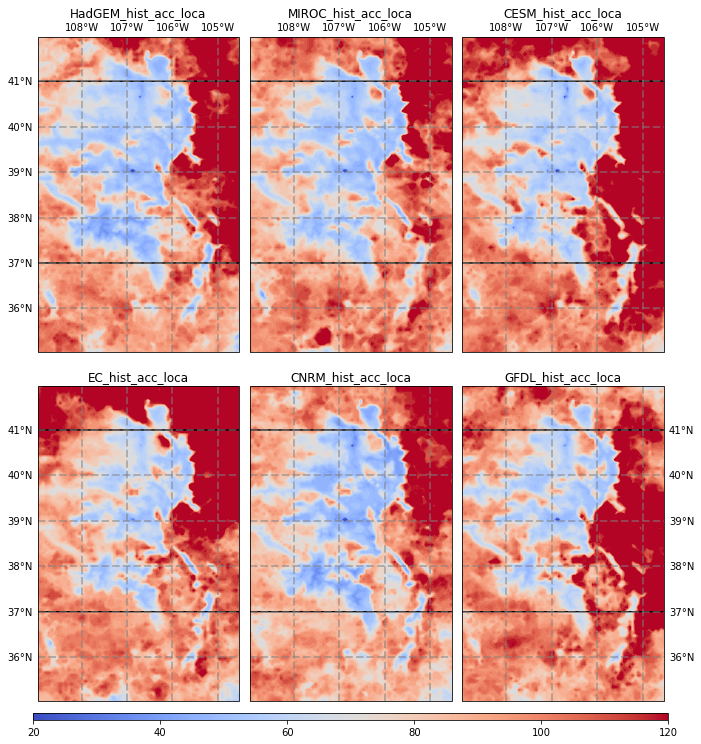

In [25]:
norm = colors.Normalize(vmin=20, vmax=120)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_acc_loca, norm)
ax1.set_title("HadGEM_hist_acc_loca", fontsize=12)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_acc_loca, norm)
ax2.set_title("MIROC_hist_acc_loca", fontsize=12)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_acc_loca, norm)
ax3.set_title("CESM_hist_acc_loca", fontsize=12)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_acc_loca, norm)
ax4.set_title("EC_hist_acc_loca", fontsize=12)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_acc_loca, norm)
ax5.set_title("CNRM_hist_acc_loca", fontsize=12)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_acc_loca, norm)
ax6.set_title("GFDL_hist_acc_loca", fontsize=12)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
add_latlon(ax1, left=True, bottom=False, right=False, top=True)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)
add_latlon(ax3, left=False, bottom=False, right=False, top=True)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)
plt.show()

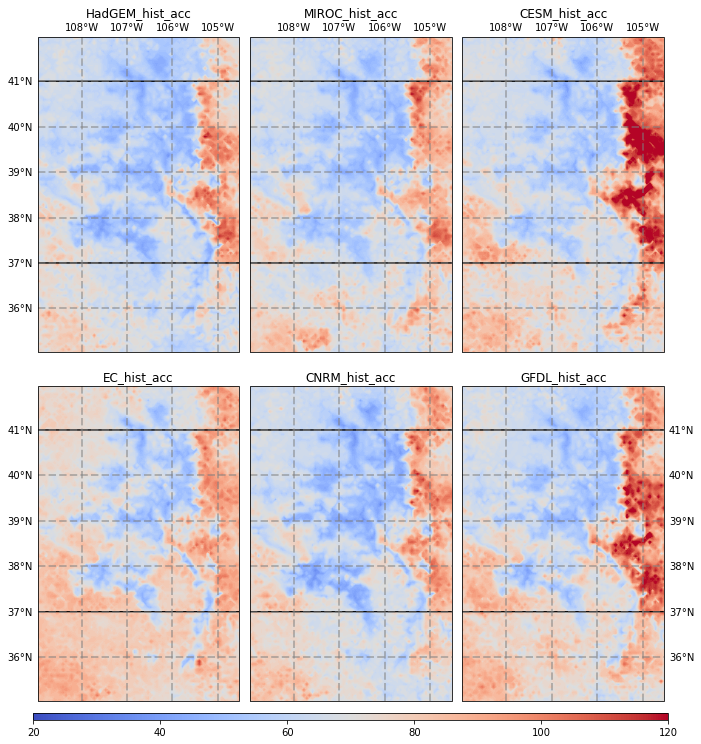

In [26]:
norm = colors.Normalize(vmin=20, vmax=120)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_acc, norm)
ax1.set_title("HadGEM_hist_acc", fontsize=12)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_acc, norm)
ax2.set_title("MIROC_hist_acc", fontsize=12)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_acc, norm)
ax3.set_title("CESM_hist_acc", fontsize=12)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_acc, norm)
ax4.set_title("EC_hist_acc", fontsize=12)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_acc, norm)
ax5.set_title("CNRM_hist_acc", fontsize=12)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_acc, norm)
ax6.set_title("GFDL_hist_acc", fontsize=12)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
add_latlon(ax1, left=True, bottom=False, right=False, top=True)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)
add_latlon(ax3, left=False, bottom=False, right=False, top=True)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)
plt.show()

# Melt date

In [27]:
CESM_hist_melt_loca = np.load('Metrics/CESM_hist_melt_loca.npy')
CESM_hist_melt = np.load('Metrics/CESM_hist_melt.npy')
CESM_rcp_melt_loca = np.load('Metrics/CESM_rcp_melt_loca.npy')
CESM_rcp_melt = np.load('Metrics/CESM_rcp_melt.npy')
print(CESM_rcp_melt.shape)
CESM_melt_change = CESM_hist_melt - CESM_rcp_melt
CESM_melt_change_loca = CESM_hist_melt_loca - CESM_rcp_melt_loca
EC_hist_melt_loca = np.load('Metrics/EC_hist_melt_loca.npy')
EC_hist_melt = np.load('Metrics/EC_hist_melt.npy')
EC_rcp_melt_loca = np.load('Metrics/EC_rcp_melt_loca.npy')
EC_rcp_melt = np.load('Metrics/EC_rcp_melt.npy')
EC_melt_change = EC_hist_melt - EC_rcp_melt
EC_melt_change_loca = EC_hist_melt_loca - EC_rcp_melt_loca
GFDL_hist_melt_loca = np.load('Metrics/GFDL_hist_melt_loca.npy')
GFDL_hist_melt = np.load('Metrics/GFDL_hist_melt.npy')
GFDL_rcp_melt_loca = np.load('Metrics/GFDL_rcp_melt_loca.npy')
GFDL_rcp_melt = np.load('Metrics/GFDL_rcp_melt.npy')
GFDL_melt_change = GFDL_hist_melt - GFDL_rcp_melt
GFDL_melt_change_loca = GFDL_hist_melt_loca - GFDL_rcp_melt_loca
CNRM_hist_melt_loca = np.load('Metrics/CNRM_hist_melt_loca.npy')
CNRM_hist_melt = np.load('Metrics/CNRM_hist_melt.npy')
CNRM_rcp_melt_loca = np.load('Metrics/CNRM_rcp_melt_loca.npy')
CNRM_rcp_melt = np.load('Metrics/CNRM_rcp_melt.npy')
CNRM_melt_change = CNRM_hist_melt - CNRM_rcp_melt
CNRM_melt_change_loca = CNRM_hist_melt_loca - CNRM_rcp_melt_loca
HadGEM_hist_melt_loca = np.load('Metrics/HadGEM_hist_melt_loca.npy')
HadGEM_hist_melt = np.load('Metrics/HadGEM_hist_melt.npy')
HadGEM_rcp_melt_loca = np.load('Metrics/HadGEM_rcp_melt_loca.npy')
HadGEM_rcp_melt = np.load('Metrics/HadGEM_rcp_melt.npy')
HadGEM_melt_change = HadGEM_hist_melt - HadGEM_rcp_melt
HadGEM_melt_change_loca = HadGEM_hist_melt_loca - HadGEM_rcp_melt_loca
MIROC_hist_melt_loca = np.load('Metrics/MIROC_hist_melt_loca.npy')
MIROC_hist_melt = np.load('Metrics/MIROC_hist_melt.npy')
MIROC_rcp_melt_loca = np.load('Metrics/MIROC_rcp_melt_loca.npy')
MIROC_rcp_melt = np.load('Metrics/MIROC_rcp_melt.npy')
MIROC_melt_change = MIROC_hist_melt - MIROC_rcp_melt
MIROC_melt_change_loca = MIROC_hist_melt_loca - MIROC_rcp_melt_loca

(112, 72)


In [28]:
print(pearsonr(GFDL_hist_melt.flatten(), GFDL_hist_melt_loca.flatten()))
print(pearsonr(CNRM_hist_melt.flatten(), CNRM_hist_melt_loca.flatten()))
print(pearsonr(EC_hist_melt.flatten(), EC_hist_melt_loca.flatten()))
print(pearsonr(CESM_hist_melt.flatten(), CESM_hist_melt_loca.flatten()))
print(pearsonr(MIROC_hist_melt.flatten(), MIROC_hist_melt_loca.flatten()))
print(pearsonr(HadGEM_hist_melt.flatten(), HadGEM_hist_melt_loca.flatten()))

(0.8243558927822794, 0.0)
(0.8304033344576235, 0.0)
(0.8880963958011354, 0.0)
(0.8541019675655951, 0.0)
(0.8516256134996534, 0.0)
(0.827393280318589, 0.0)


In [29]:
print(pearsonr(GFDL_rcp_melt.flatten(), GFDL_rcp_melt_loca.flatten()))
print(pearsonr(CNRM_rcp_melt.flatten(), CNRM_rcp_melt_loca.flatten()))
print(pearsonr(EC_rcp_melt.flatten(), EC_rcp_melt_loca.flatten()))
print(pearsonr(CESM_rcp_melt.flatten(), CESM_rcp_melt_loca.flatten()))
print(pearsonr(MIROC_rcp_melt.flatten(), MIROC_rcp_melt_loca.flatten()))
print(pearsonr(HadGEM_rcp_melt.flatten(), HadGEM_rcp_melt_loca.flatten()))

(0.86948067221466, 0.0)
(0.9213604118976313, 0.0)
(0.9134505119630711, 0.0)
(0.9335503288082946, 0.0)
(0.8658342764893745, 0.0)
(0.8927322525637319, 0.0)


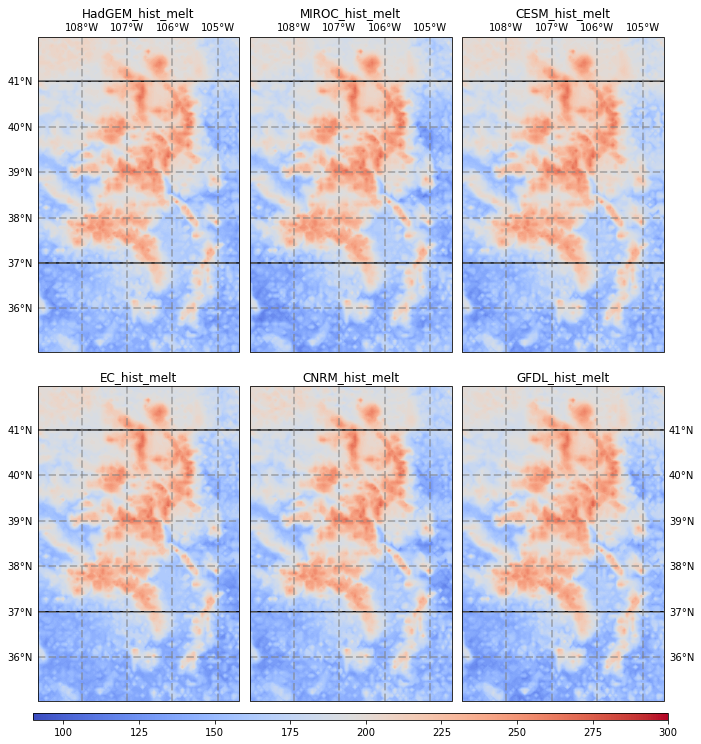

In [30]:
norm = colors.Normalize(vmin=90, vmax=300)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_melt, norm)
ax1.set_title("HadGEM_hist_melt", fontsize=12)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_melt, norm)
ax2.set_title("MIROC_hist_melt", fontsize=12)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_melt, norm)
ax3.set_title("CESM_hist_melt", fontsize=12)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_melt, norm)
ax4.set_title("EC_hist_melt", fontsize=12)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_melt, norm)
ax5.set_title("CNRM_hist_melt", fontsize=12)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_melt, norm)
ax6.set_title("GFDL_hist_melt", fontsize=12)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")

add_latlon(ax1, left=True, bottom=False, right=False, top=True)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)
add_latlon(ax3, left=False, bottom=False, right=False, top=True)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)

plt.show()

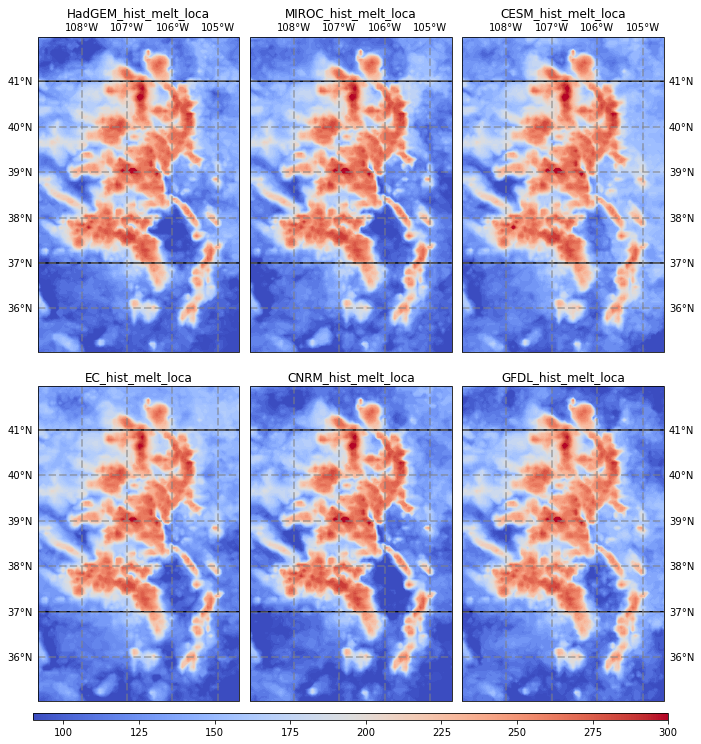

In [31]:
norm = colors.Normalize(vmin=90, vmax=300)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_melt_loca, norm)
ax1.set_title("HadGEM_hist_melt_loca", fontsize=12)
add_latlon(ax1, left=True, bottom=False, right=False, top=True)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_melt_loca, norm)
ax2.set_title("MIROC_hist_melt_loca", fontsize=12)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_melt_loca, norm)
ax3.set_title("CESM_hist_melt_loca", fontsize=12)
add_latlon(ax3, left=False, bottom=False, right=True, top=True)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_melt_loca, norm)
ax4.set_title("EC_hist_melt_loca", fontsize=12)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_melt_loca, norm)
ax5.set_title("CNRM_hist_melt_loca", fontsize=12)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_melt_loca, norm)
ax6.set_title("GFDL_hist_melt_loca", fontsize=12)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
plt.show()

# Peak Date

In [32]:
CESM_hist_date_loca = np.load('Metrics/CESM_date_hist_loca.npy')
CESM_hist_date = np.load('Metrics/CESM_date_hist.npy')
EC_hist_date_loca = np.load('Metrics/EC_date_hist_loca.npy')
EC_hist_date = np.load('Metrics/EC_date_hist.npy')
GFDL_hist_date_loca = np.load('Metrics/GFDL_date_hist_loca.npy')
GFDL_hist_date = np.load('Metrics/GFDL_date_hist.npy')
CNRM_hist_date_loca = np.load('Metrics/CNRM_date_hist_loca.npy')
CNRM_hist_date = np.load('Metrics/CNRM_date_hist.npy')
HadGEM_hist_date_loca = np.load('Metrics/HadGEM_date_hist_loca.npy')
HadGEM_hist_date = np.load('Metrics/HadGEM_date_hist.npy')
MIROC_hist_date_loca = np.load('Metrics/MIROC_date_hist_loca.npy')
MIROC_hist_date = np.load('Metrics/MIROC_date_hist.npy')

In [33]:
CESM_rcp_date_loca = np.load('Metrics/CESM_date_rcp_loca.npy')
CESM_rcp_date = np.load('Metrics/CESM_date_rcp.npy')
EC_rcp_date_loca = np.load('Metrics/EC_date_rcp_loca.npy')
EC_rcp_date = np.load('Metrics/EC_date_rcp.npy')
GFDL_rcp_date_loca = np.load('Metrics/GFDL_date_rcp_loca.npy')
GFDL_rcp_date = np.load('Metrics/GFDL_date_rcp.npy')
CNRM_rcp_date_loca = np.load('Metrics/CNRM_date_rcp_loca.npy')
CNRM_rcp_date = np.load('Metrics/CNRM_date_rcp.npy')
HadGEM_rcp_date_loca = np.load('Metrics/HadGEM_date_rcp_loca.npy')
HadGEM_rcp_date = np.load('Metrics/HadGEM_date_rcp.npy')
MIROC_rcp_date_loca = np.load('Metrics/MIROC_date_rcp_loca.npy')
MIROC_rcp_date = np.load('Metrics/MIROC_date_rcp.npy')

In [34]:
print(pearsonr(GFDL_hist_date.flatten(), GFDL_hist_date_loca.flatten()))
print(pearsonr(CNRM_hist_date.flatten(), CNRM_hist_date_loca.flatten()))
print(pearsonr(EC_hist_date.flatten(), EC_hist_date_loca.flatten()))
print(pearsonr(CESM_hist_date.flatten(), CESM_hist_date_loca.flatten()))
print(pearsonr(MIROC_hist_date.flatten(), MIROC_hist_date_loca.flatten()))
print(pearsonr(HadGEM_hist_date.flatten(), HadGEM_hist_date_loca.flatten()))

(0.8399575616359836, 0.0)
(0.8753775673041446, 0.0)
(0.9070621419857581, 0.0)
(0.8645199153751875, 0.0)
(0.8571752448277634, 0.0)
(0.840779477099362, 0.0)


In [35]:
print(pearsonr(GFDL_rcp_date.flatten(), GFDL_rcp_date_loca.flatten()))
print(pearsonr(CNRM_rcp_date.flatten(), CNRM_rcp_date_loca.flatten()))
print(pearsonr(EC_rcp_date.flatten(), EC_rcp_date_loca.flatten()))
print(pearsonr(CESM_rcp_date.flatten(), CESM_rcp_date_loca.flatten()))
print(pearsonr(MIROC_rcp_date.flatten(), MIROC_rcp_date_loca.flatten()))
print(pearsonr(HadGEM_rcp_date.flatten(), HadGEM_rcp_date_loca.flatten()))

(0.8844063952155661, 0.0)
(0.8949950792475626, 0.0)
(0.8737036026169089, 0.0)
(0.9163220035135144, 0.0)
(0.8195495470357006, 0.0)
(0.8565886525456552, 0.0)


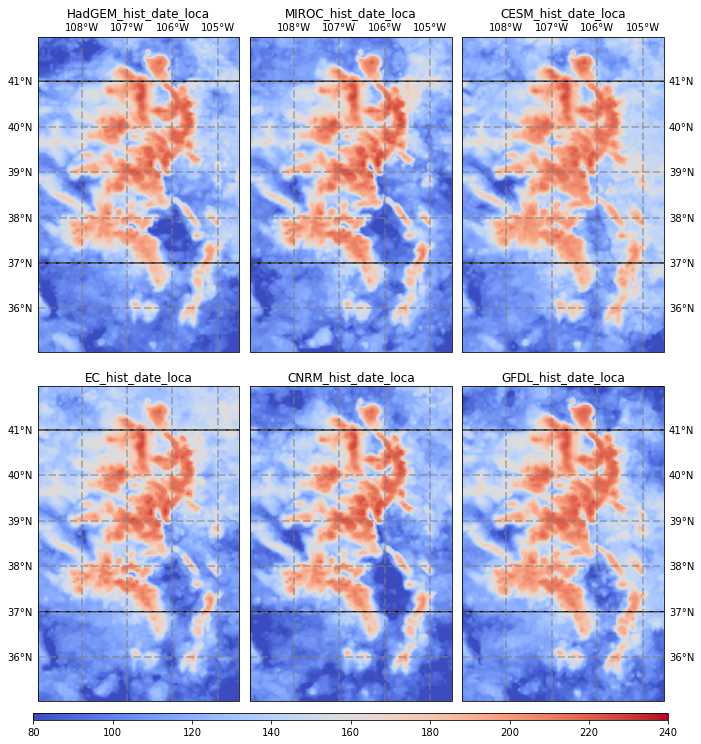

In [36]:
norm = colors.Normalize(vmin=80, vmax=240)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_date_loca, norm)
ax1.set_title("HadGEM_hist_date_loca", fontsize=12)
add_latlon(ax1, left=True, bottom=False, right=False, top=True)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_date_loca, norm)
ax2.set_title("MIROC_hist_date_loca", fontsize=12)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_date_loca, norm)
ax3.set_title("CESM_hist_date_loca", fontsize=12)
add_latlon(ax3, left=False, bottom=False, right=True, top=True)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_date_loca, norm)
ax4.set_title("EC_hist_date_loca", fontsize=12)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_date_loca, norm)
ax5.set_title("CNRM_hist_date_loca", fontsize=12)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_date_loca, norm)
ax6.set_title("GFDL_hist_date_loca", fontsize=12)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
plt.show()

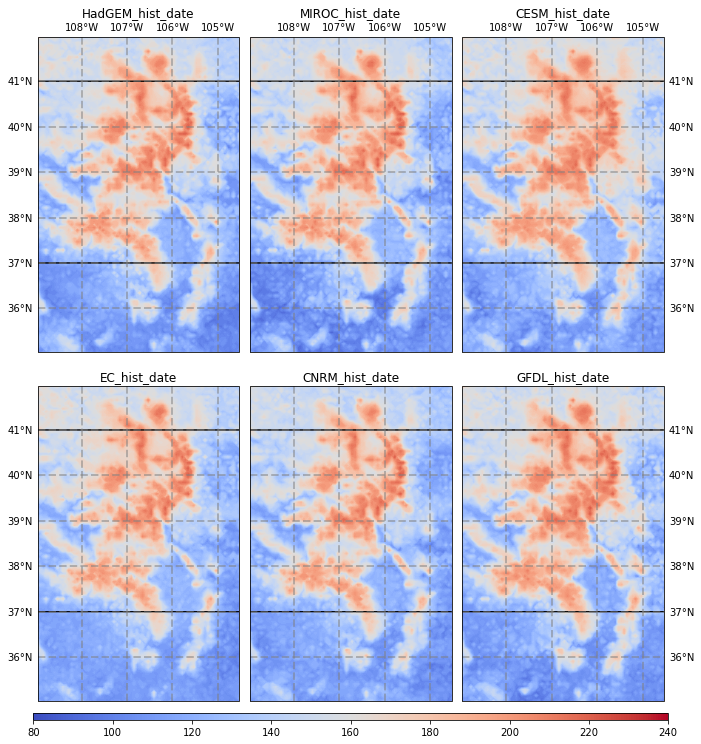

In [37]:
norm = colors.Normalize(vmin=80, vmax=240)
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
plot_snow(ax1, HadGEM_hist_date, norm)
ax1.set_title("HadGEM_hist_date", fontsize=12)
add_latlon(ax1, left=True, bottom=False, right=False, top=True)

ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
plot_snow(ax2, MIROC_hist_date, norm)
ax2.set_title("MIROC_hist_date", fontsize=12)
add_latlon(ax2, left=False, bottom=False, right=False, top=True)

ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
plot_snow(ax3, CESM_hist_date, norm)
ax3.set_title("CESM_hist_date", fontsize=12)
add_latlon(ax3, left=False, bottom=False, right=True, top=True)

ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
plot_snow(ax4, EC_hist_date, norm)
ax4.set_title("EC_hist_date", fontsize=12)
add_latlon(ax4, left=True, bottom=False, right=False, top=False)

ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
plot_snow(ax5, CNRM_hist_date, norm)
ax5.set_title("CNRM_hist_date", fontsize=12)
add_latlon(ax5, left=False, bottom=False, right=False, top=False)

ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
plot_snow(ax6, GFDL_hist_date, norm)
ax6.set_title("GFDL_hist_date", fontsize=12)
add_latlon(ax6, left=False, bottom=False, right=True, top=False)

plt.tight_layout()
fig.subplots_adjust(bottom=0.02)
cbar_ax = fig.add_axes(rect=[0.01, 0.01, 0.98, 0.01])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cbar_ax, orientation="horizontal")
plt.show()

# Metrics for NSIDC

nan   nan
(array([], dtype=int64), array([], dtype=int64))


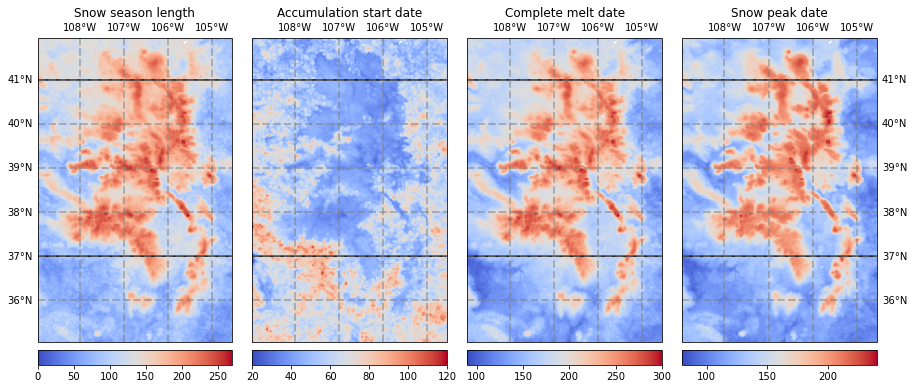

In [38]:
snow_range_nsidc = np.mean(hist_melt_nsidc - hist_acc_nsidc, axis=0)
print(np.min(snow_range_nsidc), " ", np.max(snow_range_nsidc))
print(np.where(snow_range_nsidc == 0))
norm = colors.Normalize(vmin=0, vmax=270)
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(141, projection=cartopy.crs.PlateCarree())
ax.contourf(nsidc_lon, nsidc_lat, snow_range_nsidc, transform=cartopy.crs.PlateCarree(), norm=norm, cmap="coolwarm", levels=70)
ax.add_feature(cartopy.feature.STATES, alpha=0.9)
ax.set_title('Snow season length', fontsize=12)
divider = make_axes_locatable(ax)
cax1 = divider.new_vertical(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=True)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="horizontal",
)
add_latlon(ax, left=True, bottom=False, right=False, top=True)

ax = fig.add_subplot(142, projection=cartopy.crs.PlateCarree())
norm = colors.Normalize(vmin=20, vmax=120)
ax.contourf(nsidc_lon, nsidc_lat, np.mean(hist_acc_nsidc, axis=0), transform=cartopy.crs.PlateCarree(), norm=norm, cmap="coolwarm", levels=70)
ax.add_feature(cartopy.feature.STATES, alpha=0.9)
ax.set_title('Accumulation start date', fontsize=12)
divider = make_axes_locatable(ax)
cax1 = divider.new_vertical(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=True)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="horizontal",
)
add_latlon(ax, left=False, bottom=False, right=False, top=True)

ax = fig.add_subplot(143, projection=cartopy.crs.PlateCarree())
norm = colors.Normalize(vmin=90, vmax=300)
ax.contourf(nsidc_lon, nsidc_lat, np.mean(hist_melt_nsidc, axis=0), transform=cartopy.crs.PlateCarree(), norm=norm, cmap="coolwarm", levels=70)
ax.add_feature(cartopy.feature.STATES, alpha=0.9)
ax.set_title('Complete melt date', fontsize=12)
divider = make_axes_locatable(ax)
cax1 = divider.new_vertical(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=True)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="horizontal",
)
add_latlon(ax, left=False, bottom=False, right=False, top=True)

ax = fig.add_subplot(144, projection=cartopy.crs.PlateCarree())
norm = colors.Normalize(vmin=80, vmax=240)
ax.contourf(nsidc_lon, nsidc_lat, np.mean(hist_days_nsidc, axis=0), transform=cartopy.crs.PlateCarree(), norm=norm, cmap="coolwarm", levels=70)
ax.add_feature(cartopy.feature.STATES, alpha=0.9)
ax.set_title('Snow peak date', fontsize=12)
divider = make_axes_locatable(ax)
cax1 = divider.new_vertical(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=True)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="horizontal",
)
add_latlon(ax, left=False, bottom=False, right=True, top=True)

plt.tight_layout()
plt.show()

# Upsample NSIDC

In [41]:
def build_xarray(array, lat, lon):
    data = xa.DataArray(array, dims=['latitude', 'longitude'], coords={'latitude': lat, 'longitude': lon})
    return data
def spatial_corr(nsidc, snow):
    snow_xa = build_xarray(snow, dah.lat.data.reshape(-1), dah.lon.data.reshape(-1))
    nsidc_xa = build_xarray(nsidc, nsidc_lat, nsidc_lon)
    up_nsidc_xa = nsidc_xa.interp_like(snow_xa)
    x1 = snow_xa.data.flatten()
    x2 = up_nsidc_xa.data.flatten()
    nan_ind = np.where(np.isnan(x2))[0]
    x1 = np.delete(x1, nan_ind)
    x2 = np.delete(x2, nan_ind)
    return pearsonr(x1, x2)

In [42]:
print(spatial_corr(snow_range_nsidc, HadGEM_hist_range))
print(spatial_corr(snow_range_nsidc, MIROC_hist_range))
print(spatial_corr(snow_range_nsidc, CESM_hist_range))
print(spatial_corr(snow_range_nsidc, EC_hist_range))
print(spatial_corr(snow_range_nsidc, CNRM_hist_range))
print(spatial_corr(snow_range_nsidc, GFDL_hist_range))

(0.8955208248110605, 0.0)
(0.9013496508514922, 0.0)
(0.8943518374664406, 0.0)
(0.9059292091593715, 0.0)
(0.8970154428277137, 0.0)
(0.8902701350465325, 0.0)


In [43]:
print(spatial_corr(snow_range_nsidc, HadGEM_hist_range_loca))
print(spatial_corr(snow_range_nsidc, MIROC_hist_range_loca))
print(spatial_corr(snow_range_nsidc, CESM_hist_range_loca))
print(spatial_corr(snow_range_nsidc, EC_hist_range_loca))
print(spatial_corr(snow_range_nsidc, CNRM_hist_range_loca))
print(spatial_corr(snow_range_nsidc, GFDL_hist_range_loca))

(0.8584409500906824, 0.0)
(0.8515024140290944, 0.0)
(0.8603262401363206, 0.0)
(0.8446276853956008, 0.0)
(0.8503046534701231, 0.0)
(0.8431136197750219, 0.0)


In [44]:
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), HadGEM_hist_acc_loca))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), MIROC_hist_acc_loca))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), CESM_hist_acc_loca))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), EC_hist_acc_loca))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), CNRM_hist_acc_loca))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), GFDL_hist_acc_loca))

(0.4464605448511481, 0.0)
(0.43227774544778036, 0.0)
(0.42256236981790957, 0.0)
(0.29118871545717195, 3.172276434122108e-150)
(0.4051207343367728, 8.146879534845741e-302)
(0.4152834174794167, 1.432603e-318)


In [45]:
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), HadGEM_hist_acc))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), MIROC_hist_acc))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), CESM_hist_acc))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), EC_hist_acc))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), CNRM_hist_acc))
print(spatial_corr(np.mean(hist_acc_nsidc, axis=0), GFDL_hist_acc))

(0.4981886856276874, 0.0)
(0.5327571110175946, 0.0)
(0.4366761004136547, 0.0)
(0.6057501171982359, 0.0)
(0.5497682261616765, 0.0)
(0.5135790256465581, 0.0)


In [46]:
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), HadGEM_hist_melt_loca))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), MIROC_hist_melt_loca))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), CESM_hist_melt_loca))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), EC_hist_melt_loca))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), CNRM_hist_melt_loca))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), GFDL_hist_melt_loca))

(0.8863852476072299, 0.0)
(0.8925555659547856, 0.0)
(0.9040258675283772, 0.0)
(0.9102968149182605, 0.0)
(0.8852813092097939, 0.0)
(0.8957218725371419, 0.0)


In [47]:
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), HadGEM_hist_melt))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), MIROC_hist_melt))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), CESM_hist_melt))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), EC_hist_melt))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), CNRM_hist_melt))
print(spatial_corr(np.mean(hist_melt_nsidc, axis=0), GFDL_hist_melt))

(0.9121300052939426, 0.0)
(0.9174197841822511, 0.0)
(0.9171203974201968, 0.0)
(0.8997443575623097, 0.0)
(0.9113105091403887, 0.0)
(0.9151279008417901, 0.0)


In [48]:
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), HadGEM_hist_date_loca))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), MIROC_hist_date_loca))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), CESM_hist_date_loca))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), EC_hist_date_loca))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), CNRM_hist_date_loca))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), GFDL_hist_date_loca))

(0.846818342397121, 0.0)
(0.8661499641803065, 0.0)
(0.8683447256682175, 0.0)
(0.8762170134898106, 0.0)
(0.868391692609364, 0.0)
(0.889298070659932, 0.0)


In [49]:
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), HadGEM_hist_date))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), MIROC_hist_date))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), CESM_hist_date))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), EC_hist_date))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), CNRM_hist_date))
print(spatial_corr(np.mean(hist_days_nsidc, axis=0), GFDL_hist_date))

(0.9126455110160112, 0.0)
(0.9163917830286247, 0.0)
(0.9058737237553299, 0.0)
(0.8985041507280138, 0.0)
(0.9276349929014442, 0.0)
(0.913654606502888, 0.0)
